# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

-------------------------------------------------------------------

#Imports

In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Inicialização do Data Frame

In [230]:
df = pd.read_csv("Mall_Customers.csv", delimiter=',')

#Exploração dos dados

Foram feitos gráficos do tipo boxplot com as variáveis mais propensas a outliers segundo o .describe() abaixo. Essa váriaveis foram:'score e renda anual. Apenas renda anual apresentou outliers mas usando o calculo dos quartis para delimitar o limite superior, essa quantidade de outliers foi de apenas 2 elementos.

In [231]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [232]:
#Analisando colunas com valores nulos ou faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [233]:
#Analisando média e outros valores para identificar possíveis outliers
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


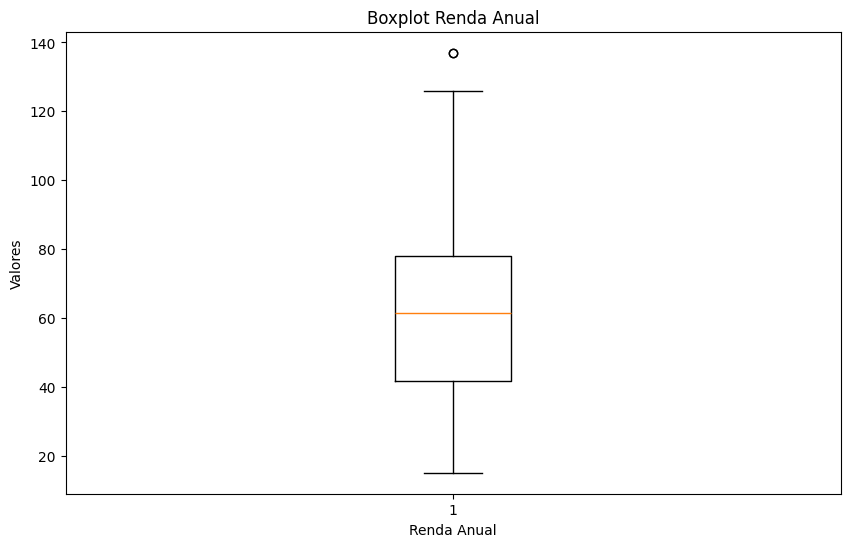

In [234]:
plt.figure(figsize=(10,6))

plt.boxplot(df['Annual Income (k$)'])
plt.title('Boxplot Renda Anual')
plt.xlabel('Renda Anual')
plt.ylabel('Valores')
plt.show()

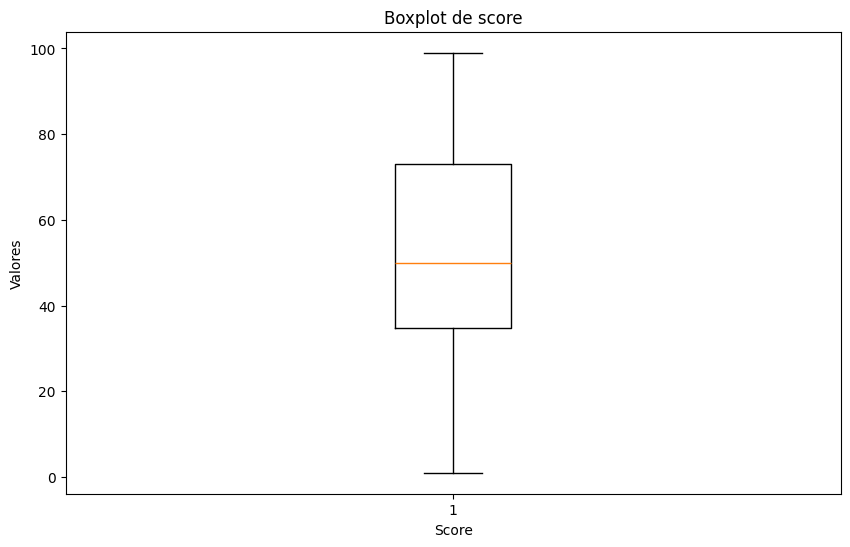

In [235]:
plt.figure(figsize=(10,6))

plt.boxplot(df['Spending Score (1-100)'])
plt.title('Boxplot de score')
plt.xlabel('Score')
plt.ylabel('Valores')
plt.show()

In [236]:
# Quartis
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Limite superior
limite_superior_income = Q3 + 1.5 * IQR

print(f"Limite superior = {limite_superior_income}")

Limite superior = 132.75


In [237]:
income_outliers = df[df['Annual Income (k$)'] > limite_superior_income].shape[0]
print(income_outliers )

2


#Tratamento dos dados

Primeiro foram eliminados os outilier identificados na coluna de renda citados acima. Depois a coluna gênero foi encodada para facilitar o processo de clusterização. Então foram feitos gráfico de 2 varíaveis por vez com todas as variáveis para identificar possiveis grupos e relações entre elas. E por ultimo, como o Kmeans é bem sensivel a escala dos valores, foi feito uma padronização das colunas.

In [ ]:
df = df[(df['Annual Income (k$)'] < limite_superior_income)]
df.info()

In [ ]:
encoder = LabelEncoder()
df['Gender_Encoded'] = encoder.fit_transform(df['Gender'])

df_refac = df.drop(['CustomerID', 'Gender'], axis=1)
df_refac.head()

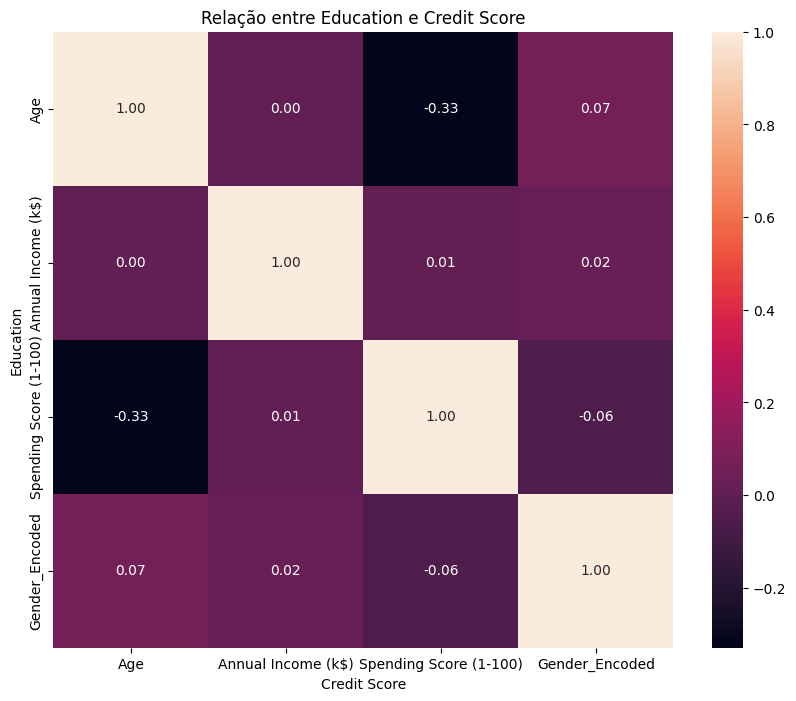

In [239]:
corr_matrix = df_refac.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Relação entre Education e Credit Score")
plt.ylabel("Education")
plt.xlabel("Credit Score")
plt.show()

In [ ]:
sns.pairplot(df_refac)

In [ ]:
df_padronizado = df_refac.copy()

colunas_padronizadas = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Encoded']
scaler = StandardScaler()

df_padronizado[colunas_padronizadas] = scaler.fit_transform(df_refac[colunas_padronizadas])
df_padronizado

#Implementação do Algoritmo K-Means

Foi implementado o algoritimo de clusterização K-means para identificar grupos de clientes que compartilhem características semelhantes. Por tentaiva e erro, foi delimitado o número de 3 clusters, visto que foi o que melhor agrupou os clientes levando em conta a dispenção entre os centroides e valores próximos das variáveis entre os pontos dos clusters.

Para a projeção dos gráficos primeiro foram encontrados os centroides (pontos centrais dos clusters) que foram 'despadronizados' (voltando a seus valores originais) para coloca-los no gráfico na escala correta. Depois foram selecionados algumas variáveis para plotar os gráficos mostrando a relação dos clusters entre essas veriáveis.

In [ ]:
kmeans_mall = KMeans(n_clusters=3, random_state=42)
kmeans_mall.fit(df_padronizado)

In [ ]:
centroides = kmeans_mall.cluster_centers_
centroides

In [ ]:
centroides_padronizados = kmeans_mall.cluster_centers_

centroides_originais = scaler.inverse_transform(centroides_padronizados)
centroides_originais

In [ ]:
labels = kmeans_mall.labels_
labels

In [ ]:

df_clusters = pd.DataFrame({
    'idade': df['Age'],
    'renda_anual': df['Annual Income (k$)'],
    'score': df['Spending Score (1-100)'],
    'genero': df['Gender_Encoded'],
    'clusters': labels.astype(str)
})

fig = px.scatter(df_clusters, x='score', y='idade', color='clusters',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters tipos de clientes')

fig.add_scatter(x=centroides_originais[:, 2], y=centroides_originais[:, 0],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Score', yaxis_title='Idade',
                  legend_title='Cluster')
fig.show()

In [ ]:
fig = px.scatter(df_clusters, x='score', y='renda_anual', color='clusters',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters tipos de clientes')

fig.add_scatter(x=centroides_originais[:, 2], y=centroides_originais[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Score', yaxis_title='Renda anual',
                  legend_title='Cluster')
fig.show()

In [ ]:
fig = px.scatter(df_clusters, x='idade', y='renda_anual', color='clusters',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters tipos de clientes')

fig.add_scatter(x=centroides_originais[:, 0], y=centroides_originais[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Idade', yaxis_title='Renda anual',
                  legend_title='Cluster')
fig.show()

In [ ]:
fig = px.scatter(df_clusters, x='genero', y='score', color='clusters',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters tipos de clientes')

fig.add_scatter(x=centroides_originais[:, 3], y=centroides_originais[:, 2],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Gênero', yaxis_title='Score',
                  legend_title='Cluster')
fig.show()

#Avaliação e Interpretação dos Resultados

Como conclusão do modelo, obtivemos 3 tipos diferentes de clientes potenciais:


1.   Tipo 0: Homem, idade mais alta em sua maioria, score mediano para baixo e renda mediana para alta.

2.   Tipo 1: Mulher; idade, renda e score variados.

3.   Tipo 2: Homens e mulheres jovens, renda baixa ou mediana e score alto.

Com esses tipos de clientes é possível elaborar estratégias de marketing mais direcionadas e acertivas. Algumas possíveis estretégias seriam:


*   Para clientes tipo 2: Como são pessoas jovens e que consomem bastante (score alto) pode-se elaborar campanhas de marketing mais descoladas em plataformas que esse público costuma utilizar bastante com instagram e tiktok. Essa campanha deve ser a que deveria receber maior investimento visto que é o grupo que mais consome.

*   Para clientes tipo 1: Nesse grupo estão presente apenas mulheres e de todas as idades, então uma possível estrátégia seria criar propagandas mais genéricas em relação a faixa etária mas que dialogue diretamente com o público feminino com promoções relacionados a produtos comprados majoritariamente por esse público.

*   Para clientes tipo 0: Como esse é o grupo com menor consumo dos 3, uma campanha de marketing mais singela como emaisl relacionados ao público masculino e principais produtos comprados por eles já poderia engajar mais esse cluster.



